# Multiple Predictors and MLR


#### Multiple Linear Regression

MLR extends simple regression to multiple predictors:

**y_pred = β0 + β1 * x1 + β2 * x2 + ... + βp * xp + ε**

Where:
- y_pred = predicted value of dependent variable
- β0 = intercept
- βn = coefficient of the n-th predictor variable
- xn = value of predictor n 
- p = number of predictors
- ε = error (residual) term 

**Each coefficient represents the expected change in y for a one-unit change in x_i, assuming other predictors remain constant. Note: This is true only when the coefficients are not scaled.**

**Significance:**
- if βi is positive, xi increases y
- if βi is negative, xi decreases y
- if βi is zero, xi has no effect on y

**Limitations:**
- if predictors are correlated, the interpretation becomes unreliable.

#### Behaviour of R-squarred

**R² (Coefficient of Determination)**
- Measures how much variance in dependent variable Y is explained by the predictors
- Higher R² → better fit (closer predictions to actual values)
- Range: 0 to 1 (can be negative in rare cases if the model is worse than a horizontal mean line)
- **Problem** increases as more predictors are added

R² = 1 – (RSS / TSS)

Where:
- RSS = Residual Sum of Squares = Σ(y_act – y_pred)²
- TSS = Total Sum of Squares = Σ(y_act – y_mean)²

**Adjusted R²**
- Adjusted R² accounts for the number of predictors in the model.
- Unlike R², it penalizes adding irrelevant variables.
- Can decrease if new predictors don’t improve the model significantly.

Adjusted R² = 1 – [(1 – R²) * (n – 1) / (n – p – 1)]

Where:
- n = number of observations
- p = number of predictors (independent variables)

**In practice, even R² is not the most effective indicator of predictive power**

#### Correlation and Multi-Collinearity

If a predictor is correlated with the target variable, it is usually a good thing.

However, when 2 predictors are highly correlated, their effects become indisguishable. 

This might be a sign of multi-collinearity, meaning a predictor may be well explained as a liear combination of some of the other predictors.

**Effects of Multicollinearity:**
- Predictor becomes redundant
- High variance in coefficient estimates -> unstable model, high complexity
- Incorrect coefficient interpretation
- Apparent fit of the mdoel becomes better, when it is not
- Significance testing becomes unreliable



#### Variance Inflation Factor

Measures how much a predictor is inflated due to correlation to other predictors. While calculating VIF, 
- we ignore the target variable
- we take one select-predictor (considering it as the target) and use the other predictors to predict the select-predictor

VIF_i = 1 / (1 – R²_i)

Where:
- VIF_i = Variance Inflation Factor for predictor i
- R²_i = R-squared value obtained when predictor i is regressed against all the other predictors

**Meaning:**
- VIF measures how much the variance of a regression coefficient (β_j) is inflated due to multicollinearity (correlation between predictors).
- Higher VIF → higher multicollinearity.

**Interpretation (common rule of thumb):**
- VIF = 1 → No correlation with other predictors (ideal).
- VIF < 5 → Acceptable multicollinearity.
- VIF ≥ 5 → High multicollinearity, to do something with the feature.
- VIF ≥ 10 → Very High multicollinearity, problematic. Usually drop.

#### Model Inference

Model inference is the process of understanding how the model is performing after it is trained.

To infer about a model, check the following:
- Did you expose the model to sufficient amount of data for training?
- What type of training data did you use?
- Did you choose the right ML model for the problem statement?
- Dif you choose the right algorithm to train the ML model?

**To improve model performance**
- Increase **amount of training data**
- Increase the **diversity of classes or values** in the training data
- Improve the **class balance** in the training data
- Decrease **bais** and increase the **variance**
- Choose the **right model** for the problem statement
- Choose appropriate **learning algorithm** to fit the model
- Tweak **hyperparameters** of the model

#### Feature Scaling

- Bringing all features to the same scale, so that we can compare their coefficients.
- With coefficient comparison (on same scale), we can then decide what to do with the weak ones.
- But interpretability of the coefficients will be lost.

Transformations of any kind should be designed using the training data only (the particular transformation can then be used on all datasets). Do not leak information from validation / test datasets into training, compromising the legitimacy of the model.




### Regularizazation

**y_pred = β0 + β1 * x1 + β2 * x2 + ... + βp * xp + ε**

RSS = Σ(y_act_i – y_pred_i)²

**Loss = RSS + λ Σ (|βᵢ|ᵖ)**

Where:
- λ = regularization strength
- βᵢ = coefficient of the i-th predictor
- p = power that determines the type of regularization
- p == 2 for Ridge Regression (L2 Regularization)
- p == 1 for Lasso Regression (L1 Regularization)
- 1 < p < 2 → Elastic Net–like behavior


**Meaning:**
- RSS = how well the model fits the data (lower = better fit)
- λ Σ(|βᵢ|ᵖ) = penalty term that discourages large coefficients
- Added a regularization term to the function
- Purpose of the regularization terms is to keep the coefficients in check
- Here, λ is a tuning parameter, while p controls the type of regularization
- If λ increases, then β has to reduce to reduce the loss
    - RSS now includes additional regularization error term
    - Recall that the objective is to minimize the loss

Note:
- Now model has to balance both components that contribute to the Loss.
- We are in a sense left with weaker coefficients, but they might potentially generalize better on unseen data
- We are trying to reduce predictive power of features upto the point where the model can offset the extra error

**Interpretation**
- **Balance of Fit vs Simplicity**
    - RSS → rewards the model for fitting the data well.
    - Penalty term → punishes the model for being too complex (large β coefficients).
    - This balance reduces overfitting.
- **Role of λ (lambda)**
    - λ = 0 → No penalty → ordinary least squares regression.
    - Small λ → Slight shrinkage → model still flexible but with some regularization.
    - Large λ → Strong penalty → coefficients shrink towards 0 → simpler model, less variance.
- **Role of p (power)**
    - p = 2 → Ridge Regression → shrinks coefficients smoothly but never zero.
    - p = 1 → Lasso Regression → some coefficients become exactly zero → feature selection.
    - 1 < p < 2 → Elastic Net → compromise between Ridge and Lasso.

**Ridge Regression (L2 Regularization)**

Loss = RSS + λ Σ(β_j²)

**Lasso Regression (L1 Regularization)**

Loss = RSS + λ Σ|β_j|

**How to Control Loss**
- **Choose λ carefully:**
    - Too small → model may overfit (low bias, high variance).
    - Too large → model may underfit (high bias, low variance).
    - Solution → use cross-validation to find the optimal λ.
- **Use Regularization to Handle Problems:**
    - If you have many correlated predictors → Ridge (p=2) works better.
    - If you want automatic feature selection → Lasso (p=1). Useful for sparce models.
    - If you want a balance → Elastic Net (1 < p < 2).
- **Interpretation of β coefficients under regularization:**
    - Smaller coefficients mean the model is relying less on those predictors.
    - Zero coefficients (in Lasso) mean predictors are effectively dropped.



#### Parameters and Hypertuning

- **Parameters of the model** = β1 , β2 ,..., βp 
    - what is the model learning?
    - Enables the model to make predictions
    - Estimated using the training algorithm (objective function optimization) - **training set** is used here
- **Hyperparameters** = λ
    - How is the model learning?
    - Enable the model to make better predictions
    - Estimated using search (FOR loops, grid search, and so on) - **validation set** is used here


**Coefficient paths → how regression coefficients shrink as λ (alpha) increases.**
- Ridge - Coefficients shrink as λ increases, but never become 0
- Lasso - Coefficients shrink as λ increases, and some can become 0 (feature dropped)

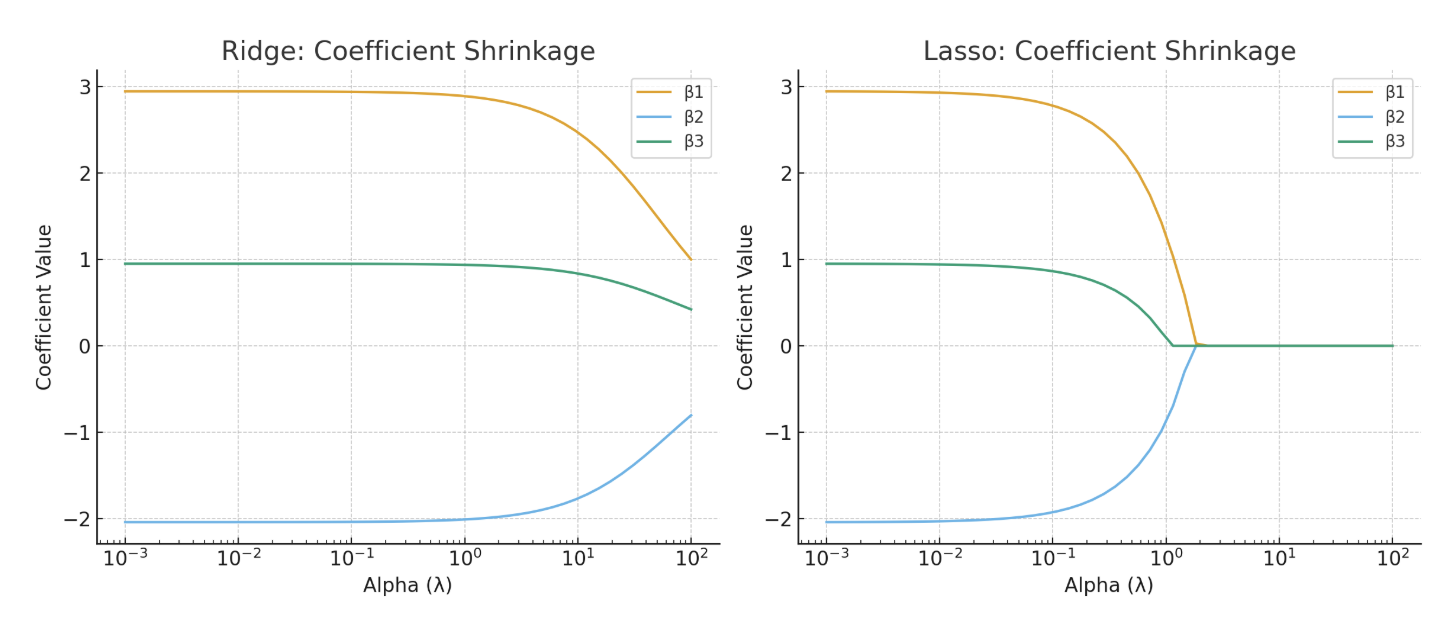

**Map of Lasso vs Ridge - Effect of alpha on MAPE**
- On a sample dataset used
- Since Ridge does not make the coefficients 0, it is retaining the model fit for higher alpha
- Since Lasso can reduce coefficients to 0, the loss could increase suddenly
- 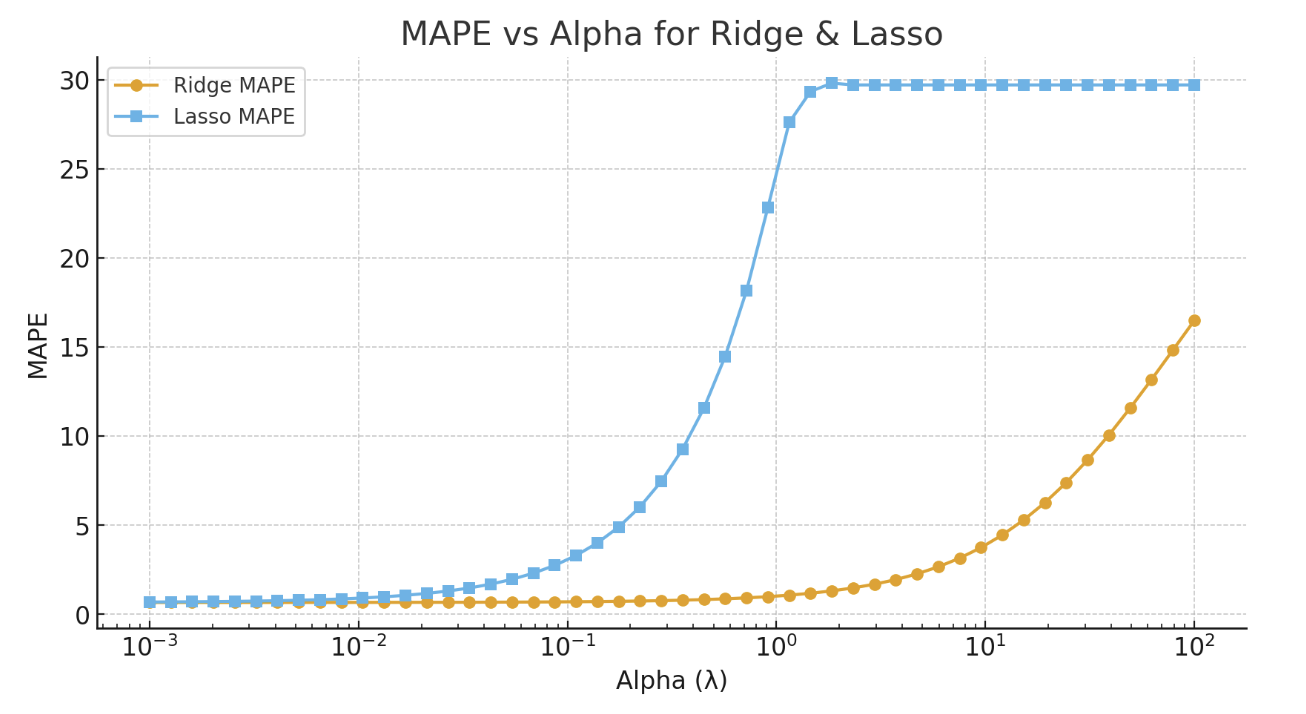

**Overfitting vs Underfitting**

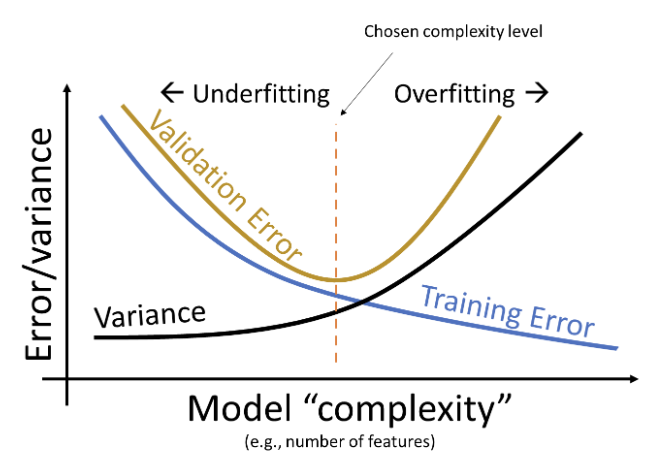

**Investigating the hyperparameter for Lasso**

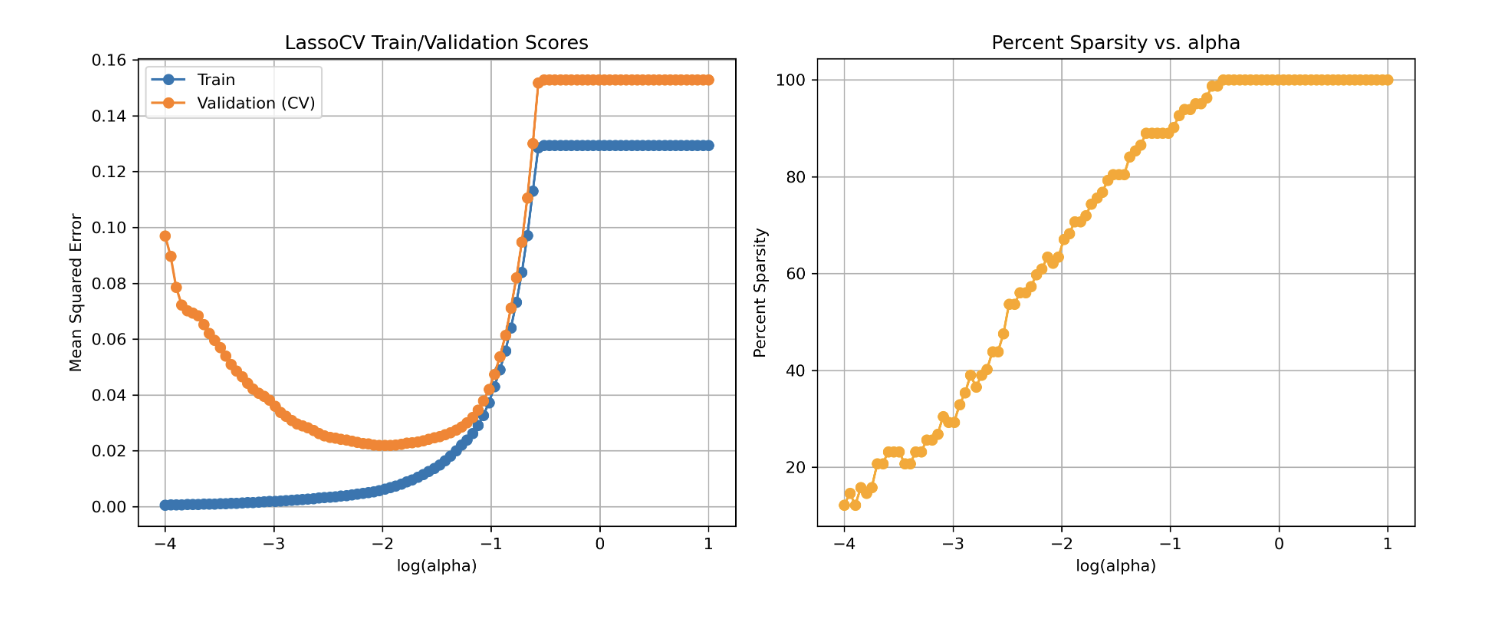

## Gradient

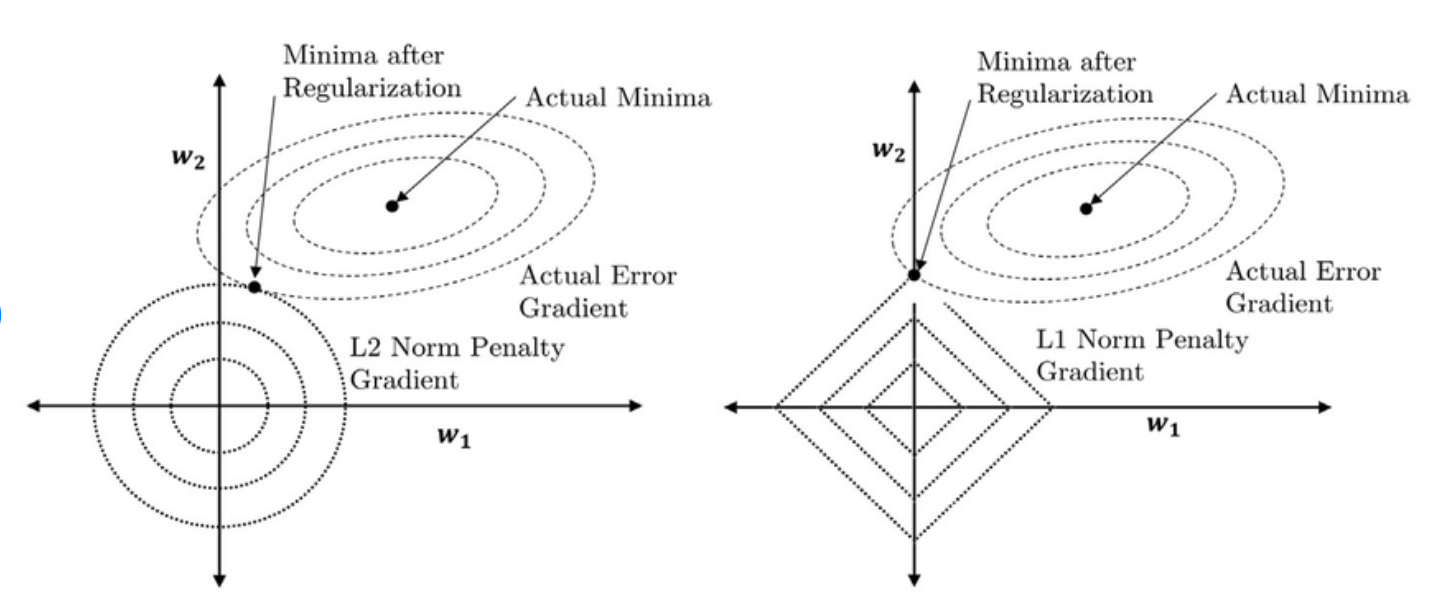

**The gradient in simple words**

- The gradient is a vector that points in the direction of the steepest ascent of a function. In training a model, we want to minimize the loss, so we move in the opposite direction of the gradient—the direction of steepest descent. 
- The total gradient used to update a model's weights is the sum of two parts: the gradient from the original loss function (e.g., mean squared error) and the gradient from the regularization penalty. 

**L1 gradient (Lasso)**
- The L1 penalty is the sum of the absolute values of the weights: λ * Σ|w|.
- Simple words: The L1 gradient is like a constant force pushing the weights toward zero, regardless of how large or small they are.
- Intuition: Imagine trying to roll a ball back to a specific spot. The L1 penalty applies the same amount of correctional "push" no matter how far away the ball is.
- Result: This constant, strong push toward zero causes less important weights to be set to exactly zero, resulting in a sparse model. 

**L2 gradient (Ridge)**
- The L2 penalty is the sum of the squared values of the weights: λ * Σw^2.
- Simple words: The L2 gradient is a force pushing the weights toward zero that gets weaker as the weights approach zero.
- Intuition: This is more like rolling a ball in a bowl. The farther the ball is from the center, the steeper the slope and the stronger the pull back toward the center. As it gets closer, the slope flattens, and the force diminishes.
- Result: The L2 penalty shrinks all weights toward zero but does not make them exactly zero. It encourages the model to spread the importance more evenly across all features. 